In [2]:
#Importing the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
#Importing the file using Panadas Dataframe
df=pd.read_csv('C:/Users/RAN/Downloads/diabetes.csv')

In [4]:
#Visualising the top 5 rows of the csv file
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Descriptive statistics showing the distribution and density of the data

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Determining the feature of the dataset
df.shape

(768, 9)

In [7]:
#Check for null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

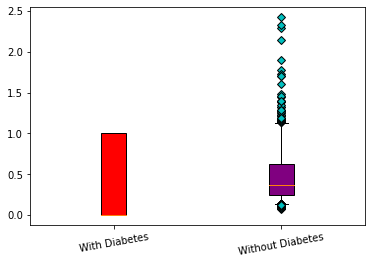

In [8]:
# A box -whisker's plot to visualise the distribution of DiabetesPedigree function vs Outcome

var1=df['Outcome']
var2=df['DiabetesPedigreeFunction']
columns=[var1,var2]
fig, ax = plt.subplots()
green_diamond = dict(markerfacecolor='c', marker='D')
box=ax.boxplot(columns,vert='true',whis=[5,95], patch_artist=True,flierprops=green_diamond)
plt.xticks([1, 2], ["With Diabetes", "Without Diabetes"], rotation=10)
colors = [ 'red','purple' ]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

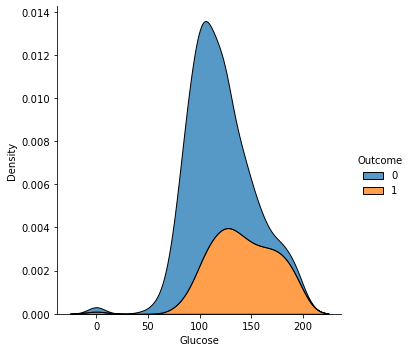

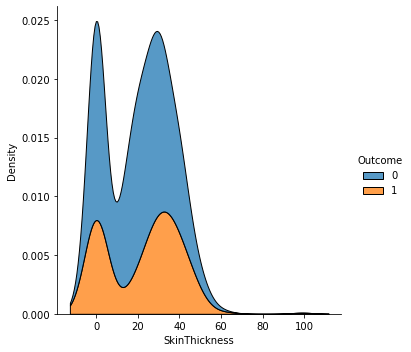

In [9]:
#Comparing the distribution of variables by grouping them based on the presence/absence of diabetes
#using Glucose and Skinthickness


sns.displot(df, x="Glucose", hue="Outcome", kind="kde", multiple="stack")
sns.displot(df, x="SkinThickness", hue="Outcome", kind="kde", multiple="stack")

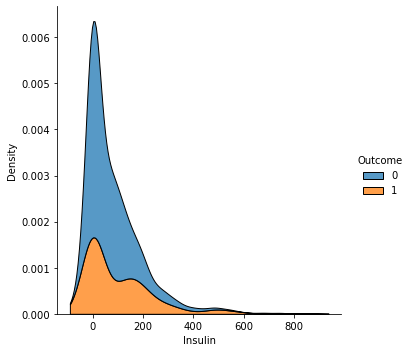

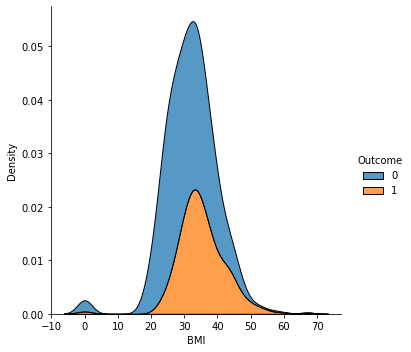

In [10]:
#Comparing the distribution of variables by grouping them based on the presence/absence of diabetes
#using Insulin and BMI

sns.displot(df, x="Insulin", hue="Outcome", kind="kde", multiple="stack")
sns.displot(df, x="BMI", hue="Outcome", kind="kde", multiple="stack")

In [11]:
#Converting the age into bins using binning 

age1=pd.cut(df.Age,bins=[0,20,40,60,80],labels=['Teenager','Young Adult','Middle Aged','Elderly'])
age1

0      Middle Aged
1      Young Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
763        Elderly
764    Young Adult
765    Young Adult
766    Middle Aged
767    Young Adult
Name: Age, Length: 768, dtype: category
Categories (4, object): ['Teenager' < 'Young Adult' < 'Middle Aged' < 'Elderly']

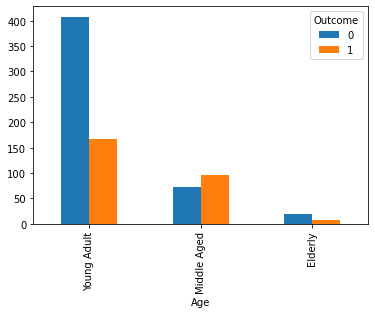

In [12]:
# A barchart to show the diabetic & non-diabetic patients across ages

pd.crosstab(age1, df['Outcome']).plot(kind='bar')
plt.show()

In [13]:
#Selecting the Dependent & Independent variables

X=df.drop(columns=['Outcome'])
y=df[['Outcome']]

In [ ]:
#Importing necessary libraries for model building

In [26]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
from xgboost import XGBClassifier

#Splitting the dataset into test & train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#Using the Random Forest Classifier
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
# Fitting the model with the dataset
forest.fit(X_train, y_train.values.ravel())

#Predicting the model using the test data
for_pred=forest.predict(X_test)

#Predicting accuracy score of the model
predictions=metrics.accuracy_score(y_test,for_pred)
print("The accuracy of the prediction using only Random forest Classifier is ",predictions*100,'%')

#Using the Naive-Baye's Classifier

NB=GaussianNB()
NB.fit(X_train, y_train.values.ravel())

NB_pred=NB.predict(X_test)
predictions=metrics.accuracy_score(y_test,NB_pred)
print("The accuracy of the prediction using only Naive Baye's Classifier is ",predictions*100,'%')

#Using the xgboost Classifier

xgb_fit =xgb.XGBClassifier(max_depth=2, n_estimators=5000, learning_rate=0.05,use_label_encoder=False, eval_metric = "logloss")
xgbmodel=xgb_fit.fit(X_train, y_train.values.ravel())
xg_pred=xgb_fit.predict(X_test)
predictions=metrics.accuracy_score(y_test,xg_pred)
print("The accuracy of the prediction after using Xgboost is ",predictions*100,'%')





The accuracy of the prediction using only Random forest Classifier is  69.6969696969697 %
The accuracy of the prediction using only Naive Baye's Classifier is  70.995670995671 %
The accuracy of the prediction after using Xgboost is  70.995670995671 %
